## 9. アソシエーション分析による共起分析
### 9.1 アソシエーション分析
**アソシエーション分析**は、POS(販売時点情報)データ解析のために開発された方法である。  
以下のPOSデータをイメージした架空のデータを示す。
このようなデータを**マーケット・バスケット・トランザクション**と呼び、各行を1つのトランザクション、あるいはバスケットと呼ぶ。  
アソシエーション分析は、バスケットの中の商品間の関連性について分析を行う方法である。  
トランザクションデータから、頻出するアイテムの組み合わせの規則性を漏れなく抽出し、興味深い結果を探し出すことを主な目的とする。  
Aprioriなどのアソシエーション分析のアルゴリズムには、ルールを返すものと、頻出アイテムセットを返すものがある。

In [1]:
import pandas as pd

d1 = pd.DataFrame({'TID':[1,2,3,4,5],
                   'アイテム集合':[{'パン','牛乳','ハム','果物'},
                                   {'パン','オムツ','ビール','ハム'},
                                   {'ソーセージ','ビール','オムツ'},
                                   {'弁当','ビール','オムツ','タバコ'},
                                   {'弁当','ビール','オレンジジュース','果物'}]})
d1

,TID,アイテム集合
0,1,"{果物, 牛乳, パン, ハム}"
1,2,"{オムツ, パン, ハム, ビール}"
2,3,"{オムツ, ソーセージ, ビール}"
3,4,"{弁当, タバコ, ビール, オムツ}"
4,5,"{弁当, オレンジジュース, ビール, 果物}"


### 9.2 アソシエーション・ルール
#### アソシエーション・ルールとは
トランザクションデータベースに頻出するアイテム間の組み合わせの規則を**アソシエーション・ルール**と呼ぶ。  
「商品Aを買うと商品Bも買う」というように、項目間に同時性や関連性があるルールを**相関ルール**と呼び、「{A}⇒{B}」と表す。  
この「⇒」の左辺を条件部(antecedent:LHS)、右辺を結論部(consequent:RHS)と呼ぶ。  
アソシエーション・ルールを検出するもっとも広く知られているアルゴリズムは、Apriori(アプリオリ)である。

#### ルールの評価指標
アソシエーション・ルールを検出する際、何らかの評価指標が必要である。  
多く用いられている指標としては**支持度**、**確信度**、**リフト**がある。  
ルールX⇒Yの支持度は、アイテム集合XとYを同時に含むトランザクションが全体の中に占める割合である。  
$$
supp(X⇒Y)=\frac{XとYを同時に含む件数}{全体の件数}
$$
確信度は、アイテム集合XとYを含むルールの件数が条件Xを含む件数の中に占める割合である。
$$
conf(X⇒Y)=\frac{supp(X⇒Y)}{supp(X)}=\frac{XとYを同時に含む件数}{Xを含む件数}
$$
リフトは、確信度を結論部の支持度で割った値である。
$$
lift(X⇒Y)=\frac{conf(X⇒Y)}{supp(X)}=\frac{確信度}{Yを含む件数/全体の件数}
$$
  
例えば、X={オムツ}、Y={ビール}とすると、Xを含むのは3件、Yを含むのは4件、XとYを同時に含むのは3件、総件数は5件である。  
ルールX⇒Yの支持度は、確信度、リフトはそれぞれ、  
$supp(X⇒Y)=3/5=0.6$、$conf(X⇒Y)=3/3=1$、$lift(X⇒Y)=1/(4/5)=1.25$である。

#### データ形式と操作
##### データ形式と変換
トランザクション形式の場合、TID(Transaction ID)ごとにアイテム数もアイテム名もさまざまである。
トランザクションデータは次に表す表のように、バスケットにあるアイテムは１、ないもの0として行列形式で表すことができる。

In [2]:
import numpy as np

d1_b = pd.DataFrame(d1['アイテム集合'].astype('str').str.replace('[{}\']', ''), columns=['アイテム集合'])
d1_b=d1_b['アイテム集合'].str.split('[{,}]', expand=True)
d1_b['TID'] = np.arange(1,6)
d1_b = d1_b.melt(id_vars='TID', value_name='アイテム')
pd.crosstab(d1_b['TID'], d1_b['アイテム'])

<ipython-input-2-f5690d823337>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  d1_b = pd.DataFrame(d1['アイテム集合'].astype('str').str.replace('[{}\']', ''), columns=['アイテム集合'])


アイテム,オムツ,オレンジジュース,ソーセージ,タバコ,ハム,パン,ビール,果物,牛乳,オムツ,弁当,果物
TID,,,,,,,,,,,,
1,0,0,0,0,1,1,0,0,1,0,0,1
2,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,1,1,0,0,1,0


各アイテムとトランザクションの番号との関係を示す。

In [3]:
pd.DataFrame(d1_b.groupby("アイテム")["TID"].apply(tuple)).reset_index()

,アイテム,TID
0,オムツ,"(4,)"
1,オレンジジュース,"(5,)"
2,ソーセージ,"(3,)"
3,タバコ,"(4,)"
4,ハム,"(2, 1)"
5,パン,"(2, 1)"
6,ビール,"(3, 4, 5, 2)"
7,果物,"(5,)"
8,牛乳,"(1,)"
9,オムツ,"(2, 3)"


##### テキストデータの準備と操作
短い文を語や文節に分割し、その語や文節のバスケットの中のアイテムと見なすことで、語や文節の共起関係のルールを抽出することができる。
仮想的なアンケートの自由回答文10個のデータを使用する。

In [4]:
data1 = [["学費", "下げ", "講義", "充実", "はかっ", "欲しい", "適当", "授業", "いる", "思わ", "れる", "先生", "かなり", "居る"],
         ["学費", "もう少し", "安く", "欲しい"],
         ["休み", "期間", "多い", "割", "学費", "高い", "何", "使わ", "いる", "はっきりし", "欲しい"],
         ["授業", "担当", "教員", "生徒", "選ば", "欲しい"],
         ["学費", "削減", "あと", "ロッカー"],
         ["個人", "ロッカー", "作っ", "下さい", "自動車", "通学", "認め"],
         ["学費", "軽減"],
         ["学費", "もっと", "安く", "欲しい"],
         ["クーラー", "つけ", "欲しい"],
         ["学費", "安く", "下さい"]]
dataset = pd.DataFrame({'Items':data1}, index=np.arange(10))
df = dataset['Items']

単語の出現回数を可視化する。

Text(0, 0.5, '頻度')

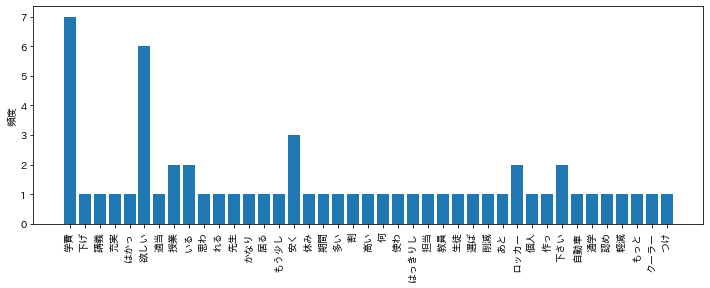

In [5]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

word_list = []
for w in data1:
    word_list += w

#単語の数カウント
c = collections.Counter(word_list)

count_data = pd.DataFrame({'word':dict(c).keys(),
                           'count':dict(c).values()})

plt.figure(figsize=(12,4))
plt.bar(x=count_data['word'], height=count_data['count']);
plt.xticks(rotation=90);
plt.ylabel('頻度')

#### ルールの抽出
相関ルールを抽出するためaprioriを用いる。  
支持度がもっとも高いアイテムは{学費}で、支持度がもっとも高いルールは「{安く}→{学費}」である。
共起関係について分析しようとするときには、語の前後関係が示されるネットワーク分析よりメリットがない。  
しかし、アンケート調査結果の分析を行うとき、自由回答文とアンケート調査の他の項目を選択した情報とをリンク付けして  
分析することができるため、アソシエーション分析を用いたほうが便利である。

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
freq_items1 = apriori(df2, min_support=0.1, use_colnames=True)

In [7]:
freq_items1.sort_values(['support'], ascending=False).reset_index(drop=True)

,support,itemsets
0,0.7,(学費)
1,0.6,(欲しい)
2,0.4,"(学費, 欲しい)"
3,0.3,(安く)
4,0.3,"(安く, 学費)"
...,...,...
18649,0.1,"(学費, 欲しい, 割, 期間, いる, 高い)"
18650,0.1,"(欲しい, 多い, 割, 期間, いる, 高い)"
18651,0.1,"(学費, 欲しい, 多い, 割, いる, 高い)"
18652,0.1,"(学費, 多い, 割, 期間, いる, 高い)"


In [8]:
a_rules1 = association_rules(freq_items1, metric='confidence', min_threshold=1)
a_rules1 = a_rules1.sort_values(['support','leverage'], ascending=False).reset_index(drop=True)
a_rules1.loc[:10,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(安く),(学費),0.3,0.7,0.3,1.0,1.428571,0.09,inf
1,(いる),"(学費, 欲しい)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
2,(いる),(欲しい),0.2,0.6,0.2,1.0,1.666667,0.08,inf
3,(授業),(欲しい),0.2,0.6,0.2,1.0,1.666667,0.08,inf
4,"(学費, いる)",(欲しい),0.2,0.6,0.2,1.0,1.666667,0.08,inf
5,(いる),(学費),0.2,0.7,0.2,1.0,1.428571,0.06,inf
6,"(いる, 欲しい)",(学費),0.2,0.7,0.2,1.0,1.428571,0.06,inf
7,"(安く, 欲しい)",(学費),0.2,0.7,0.2,1.0,1.428571,0.06,inf
8,(削減),(あと),0.1,0.1,0.1,1.0,10.000000,0.09,inf
9,(あと),(削減),0.1,0.1,0.1,1.0,10.000000,0.09,inf


ルールの右辺(結論部)が「安く」という語になっているルールのみを抽出した結果を次に示す。

In [60]:
data2 = a_rules1[a_rules1['consequents']=={'安く'}].reset_index(drop=True)
data2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(もう少し),(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
1,(もっと),(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
2,"(学費, もう少し)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
3,"(もう少し, 欲しい)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
4,"(学費, もっと)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
5,"(もっと, 欲しい)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
6,"(学費, 下さい)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
7,"(学費, 欲しい, もう少し)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf
8,"(学費, もっと, 欲しい)",(安く),0.1,0.3,0.1,1.0,3.333333,0.07,inf


#### ルールの視覚化
ルールを構成する語は「もう少し」「もっと」「学費」「欲しい」「下さい」「安く」であり、語からルールに向かって矢印が示された場合、これらの語はルールの左辺(条件部)の構成要素であることを示す。
例えば、rule9には「もっと」「学費」「欲しい」という3つの語から矢印が出ており、さらにrule9から「安く」に矢印が向かっている。
これらから、rule9のルールは{もっと、学費、欲しい}→{安く}になる。

In [95]:
ant = data2['antecedents'].astype('str').str.replace('[(frozenset)\{\}\']', '').str.split('[{,}]', expand=True)
ant['ID'] = ['rule'+str(i+1) for i in np.arange(9)]
ant = ant.melt(id_vars='ID', value_name='item')[['ID', 'item']]
ant= ant[~ant['item'].isna()]
ant[['ID', 'item']] = ant[['item', 'ID']]
ant['ID'] = ant['ID'].str.replace(' ', '')
ant['item'] = ant['item'].str.replace(' ', '')
ant[:10]

<ipython-input-95-cc3794d6f4d2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ant = data2['antecedents'].astype('str').str.replace('[(frozenset)\{\}\']', '').str.split('[{,}]', expand=True)


,ID,item
0,もう少し,rule1
1,もっと,rule2
2,学費,rule3
3,もう少し,rule4
4,学費,rule5
5,もっと,rule6
6,学費,rule7
7,学費,rule8
8,学費,rule9
11,もう少し,rule3


In [96]:
con = data2['consequents'].astype('str').str.replace('[(frozenset)\{\}\']', '').str.split('[{,}]', expand=True).replace(' ','')
con['ID'] = ['rule'+str(i+1) for i in np.arange(9)]
con = con.melt(id_vars='ID', value_name='item')[['ID', 'item']]
con= con[~con['item'].isna()]
plot_data = pd.concat([con, ant]).reset_index(drop=True)

<ipython-input-96-13e0a8bcb8e0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  con = data2['consequents'].astype('str').str.replace('[(frozenset)\{\}\']', '').str.split('[{,}]', expand=True).replace(' ','')


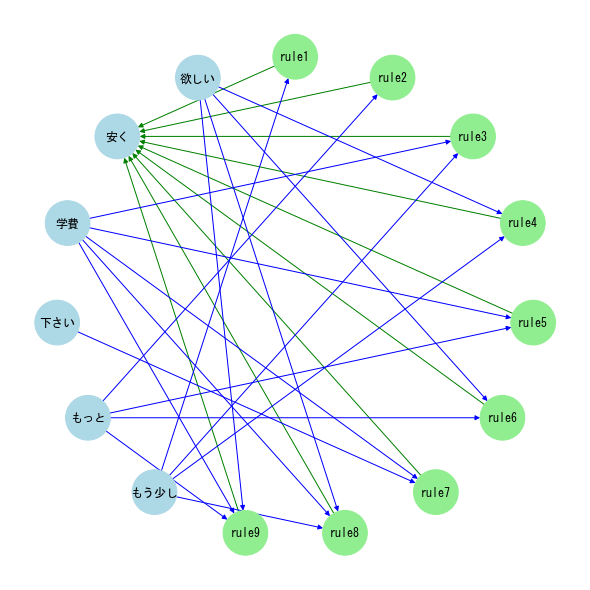

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# Graphオブジェクトの作成
G = nx.Graph()
G2 = nx.DiGraph(G) 
 
# nodeデータの追加
v = np.unique([plot_data.ID]+[plot_data.item])
G2.add_nodes_from(v)
 
# edgeデータの追加
G2.add_edges_from([(plot_data.loc[i, 'ID'], plot_data.loc[i, 'item']) for i in range(len(plot_data))])

c = ['lightgreen' if 'rule' in s else 'lightblue' for s in v]
e_c = ['green' if 'rule' in u else 'blue' for u,v,w in G2.edges(data=True)]

n=len(v)
pos = {}
for i in np.arange(n):
    pos.update({v[i]: (0.8*np.sin(2*np.pi/n*i), 0.8*np.cos(2*np.pi/n*i))})

    
plt.figure(figsize=(8,8))
# ネットワークの可視化
nx.draw(G2, with_labels = True, node_size = 2000, node_color=c,edge_color=e_c, pos=pos, font_family='MS Gothic')

plt.show()

### 頻出共起の抽出
#### 頻出共起の抽出アルゴリズムeclat
検索アルゴリズムには大きく分けて、幅優先検索と深さ優先検索に分けることができる。
Aprioriは幅優先検索タイプに属する。
深さ優先検索タイプのアルゴリズムにeclatというアルゴリズムがある。
eclatは、最小支持度の減少による性能の悪化がAprioriより少ないが、頻出アイテムが多いときには性能が悪くなる可能性がある。

#### アルゴリズムeclatの例
eclatによって返される結果は、相関ルールでｈなく、頻出する語の組み合わせの集合{X,Y}である。

pyECLATというパッケージを使用する場合、次のようなデータを作成する。

In [168]:
data_tr = dataset['Items'].astype(str).str.split(',', expand=True)
data_tr = data_tr.apply(lambda x: x.str.replace('[\[\]\ \']',''))
data_tr

<ipython-input-168-9899d9be66dc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_tr = data_tr.apply(lambda x: x.str.replace('[\[\]\ \']',''))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,学費,下げ,講義,充実,はかっ,欲しい,適当,授業,いる,思わ,れる,先生,かなり,居る
1,学費,もう少し,安く,欲しい,None,None,None,None,None,None,None,None,None,None
2,休み,期間,多い,割,学費,高い,何,使わ,いる,はっきりし,欲しい,None,None,None
3,授業,担当,教員,生徒,選ば,欲しい,None,None,None,None,None,None,None,None
4,学費,削減,あと,ロッカー,None,None,None,None,None,None,None,None,None,None
5,個人,ロッカー,作っ,下さい,自動車,通学,認め,None,None,None,None,None,None,None
6,学費,軽減,None,None,None,None,None,None,None,None,None,None,None,None
7,学費,もっと,安く,欲しい,None,None,None,None,None,None,None,None,None,None
8,クーラー,つけ,欲しい,None,None,None,None,None,None,None,None,None,None,None
9,学費,安く,下さい,None,None,None,None,None,None,None,None,None,None,None


eclatの実行をする。

In [158]:
from pyECLAT import ECLAT

# 引数情報
min_support    = 0.01                                 # 出力する結果のsupprt最小値
min_n_products = 2                                    # 最小の商品組み合わせ数
#max_length     = max([len(x) for x in dataset])  # 出力するアソシエーション・ルール数
max_length     = 3  # 出力するアソシエーション・ルール数

# create an instance of eclat
my_eclat = ECLAT(data=data_tr, verbose=True)

# Eclat
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length
                                          )




  0%|                                                                                           | 0/42 [00:00<?, ?it/s]


 38%|██████████████████████████████▊                                                  | 16/42 [00:00<00:00, 146.96it/s]


 90%|█████████████████████████████████████████████████████████████████████████▎       | 38/42 [00:00<00:00, 161.97it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 179.19it/s]


  0%|                                                                                           | 0/42 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 33637.73it/s]


  0%|                                                                                           | 0/42 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 1911.32it/s]

Combination 2 by 2





0it [00:00, ?it/s]


23it [00:00, 206.82it/s]


38it [00:00, 184.99it/s]


55it [00:00, 172.49it/s]


73it [00:00, 174.11it/s]


99it [00:00, 192.77it/s]


118it [00:00, 191.82it/s]


136it [00:00, 185.33it/s]


158it [00:00, 187.17it/s]


176it [00:00, 183.62it/s]


195it [00:01, 183.97it/s]


213it [00:01, 170.78it/s]


230it [00:01, 160.74it/s]


247it [00:01, 157.20it/s]


263it [00:01, 152.75it/s]


283it [00:01, 164.04it/s]


300it [00:01, 156.40it/s]


321it [00:01, 168.19it/s]


340it [00:01, 172.87it/s]


358it [00:02, 162.68it/s]


380it [00:02, 174.90it/s]


399it [00:02, 178.96it/s]


418it [00:02, 174.43it/s]


439it [00:02, 181.45it/s]


463it [00:02, 191.22it/s]


486it [00:02, 200.26it/s]

7445it [00:55, 185.70it/s]


507it [00:02, 190.06it/s]


527it [00:02, 191.01it/s]


549it [00:03, 195.89it/s]


571it [00:03, 194.56it/s]


596it [00:03, 206.62it/s]


620it [00:03, 214.34it/s]


642it [00:03, 209.27it/s]


664it [00:03, 209.83it/s]


686it [00:03, 195.33it/s]


7

Combination 3 by 3





0it [00:00, ?it/s]


17it [00:00, 159.24it/s]


29it [00:00, 143.31it/s]


41it [00:00, 132.39it/s]


55it [00:00, 133.69it/s]


73it [00:00, 144.26it/s]


88it [00:00, 145.38it/s]


101it [00:00, 130.17it/s]


117it [00:00, 136.92it/s]


135it [00:00, 146.52it/s]


154it [00:01, 155.99it/s]


176it [00:01, 170.54it/s]


194it [00:01, 129.51it/s]


209it [00:01, 129.55it/s]


227it [00:01, 140.59it/s]


244it [00:01, 147.20it/s]


261it [00:01, 151.40it/s]


285it [00:01, 168.11it/s]


308it [00:02, 181.19it/s]


328it [00:02, 164.14it/s]


346it [00:02, 146.52it/s]


363it [00:02, 146.96it/s]


384it [00:02, 160.07it/s]


407it [00:02, 175.22it/s]


428it [00:02, 184.32it/s]


450it [00:02, 193.37it/s]


474it [00:02, 204.63it/s]


500it [00:03, 218.58it/s]


524it [00:03, 222.77it/s]


547it [00:03, 217.36it/s]


570it [00:03, 214.40it/s]


592it [00:03, 191.36it/s]


613it [00:03, 194.11it/s]


633it [00:03, 193.62it/s]


653it [00:03, 192.47it/s]


679it [00:03, 207.81it/s]


70

頻度および支持度でソートした結果を示す。

In [166]:
score_sorted = sorted(rule_indices.items(), key=lambda x:x[1], reverse=True)
score_sorted[:10]

[('学費 & 下さい', [9]),
 ('下さい & 安く', [9]),
 ('学費 & 下さい & 安く', [9]),
 ('つけ & クーラー', [8]),
 ('つけ & 欲しい', [8]),
 ('クーラー & 欲しい', [8]),
 ('つけ & クーラー & 欲しい', [8]),
 ('もっと & 学費', [7]),
 ('もっと & 安く', [7]),
 ('もっと & 欲しい', [7])]

In [167]:
score_sorted = sorted(rule_supports.items(), key=lambda x:x[1], reverse=True)
score_sorted[:10]

[('学費 & 欲しい', 0.4),
 ('学費 & 安く', 0.3),
 ('学費 & いる', 0.2),
 ('授業 & 欲しい', 0.2),
 ('安く & 欲しい', 0.2),
 ('いる & 欲しい', 0.2),
 ('学費 & 安く & 欲しい', 0.2),
 ('学費 & いる & 欲しい', 0.2),
 ('何 & 使わ', 0.1),
 ('何 & 割', 0.1)]